<a href="https://colab.research.google.com/github/LoniQin/deep_learning_notebooks/blob/master/tensorflow/Kaggle_Competition_Digit_Recognizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import necessary Libraries

In [2]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout 
import pandas as pd

## Load data

In [ ]:
train = np.loadtxt(open('/kaggle/input/digit-recognizer/train.csv', 'r'), delimiter=',', skiprows=1, dtype='float32')
test = np.loadtxt(open('/kaggle/input/digit-recognizer/test.csv', 'r'), delimiter=',', skiprows=1, dtype='float32')
train_images = train[:, 1:].reshape((train.shape[0], 28, 28, 1)) / 255.0
train_labels = train[:, 0].astype(np.uint8)
test_images = test.reshape((test.shape[0], 28, 28, 1)) / 255.0

## Create the model

In [ ]:
model = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

## Compile the model

In [ ]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

## Display summary of the model

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

## Train data

In [ ]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0447 - accuracy: 0.9857
Epoch 2/10
1313/1313 [==============================] - 39s 30ms/step - loss: 0.0327 - accuracy: 0.9896
Epoch 3/10
1313/1313 [==============================] - 39s 29ms/step - loss: 0.0268 - accuracy: 0.9912
Epoch 4/10
1313/1313 [==============================] - 40s 31ms/step - loss: 0.0216 - accuracy: 0.9931
Epoch 5/10
1313/1313 [==============================] - 40s 31ms/step - loss: 0.0197 - accuracy: 0.9933
Epoch 6/10
1313/1313 [==============================] - 39s 29ms/step - loss: 0.0178 - accuracy: 0.9938
Epoch 7/10
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0149 - accuracy: 0.9951
Epoch 8/10
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0116 - accuracy: 0.9961
Epoch 9/10
1313/1313 [==============================] - 38s 29ms/step - loss: 0.0128 - accuracy: 0.9953
Epoch 10/10
1313/1313 [==============================] - 38s 29m

## Plot the learning curve

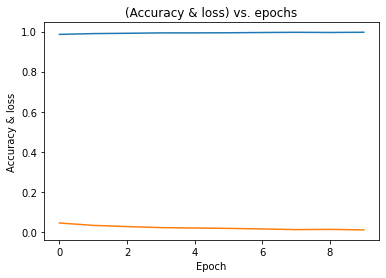

In [ ]:
import matplotlib.pyplot as plt
try:
    plt.plot(history.history['accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
plt.plot(history.history['loss'])
plt.title('(Accuracy & loss) vs. epochs')
plt.ylabel('Accuracy & loss')
plt.xlabel('Epoch')
plt.show()

## Predict data

In [ ]:
test_labels = np.argmax(model.predict(test_images), axis=-1)
print(test_labels.shape)

(28000,)


Now we print first 100 item of test_labels.

In [ ]:
print(test_labels[:100])

[2 0 9 9 3 7 0 3 0 3 5 7 4 0 4 3 3 1 9 0 9 1 1 5 7 4 2 7 4 7 7 5 4 2 6 2 5
 5 1 6 7 7 4 9 8 7 8 2 6 7 6 8 8 3 8 2 1 2 2 0 4 1 7 0 0 0 1 9 0 1 6 5 8 8
 2 8 9 9 2 3 5 4 1 0 9 2 4 3 6 7 2 0 6 6 1 4 3 9 7 4]


## Sumbit the data

In [ ]:
image_ids = np.arange(1, test_labels.shape[0]+1)
result = np.concatenate((image_ids.reshape(image_ids.shape[0], 1), test_labels.reshape(test_labels.shape[0], 1)), axis=1)
df = pd.DataFrame(result, columns=["ImageId", "Label"], dtype='int')
df.to_csv("submission.csv", index=False)